# NBACK_CLASSIFICATION BRANCH 
- 2-back classify same(1) or different(2). 
- 2 stimuli, 30 trials per episode
    - NB more than 2 stimuli makes "different" more likely

In [30]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
cell_size = 30
depth = 20

num_stim = 2
numback = 10

ML = MetaLearner(cell_size,depth=depth,num_stim=num_stim,preunroll=numback)

In [32]:
trainer = Trainer(ML,numback)

In [36]:
NUM_EPOCHS = 2000
EPOCHS_PER_SESSION = 2000 
train_loss,train_acc = trainer.train_loop(NUM_EPOCHS,EPOCHS_PER_SESSION)

0.0 0.6836973
0.05 0.69472814
0.1 0.6933888
0.15 0.68675524
0.2 0.701485
0.25 0.7069693
0.3 0.7006855
0.35 0.6923708
0.4 0.6923977
0.45 0.6935195
0.5 0.69314796
0.55 0.69000036
0.6 0.6699956
0.65 0.6912057
0.7 0.6931906
0.75 0.6872168
0.8 0.6932504
0.85 0.6744346
0.9 0.6982647
0.95 0.69253314
(1, 10)


In [46]:
model_dir = 'models/sweep_N/state_%i-depth_%i-numstim_%i-nback_%i/'%(cell_size,depth,num_stim,numback)
ML.saver_op.save(ML.sess,model_dir+'final')
np.save(model_dir+'train_loss',train_loss)
np.save(model_dir+'train_acc',train_loss)

INFO:tensorflow:models/sweep_N/state_30-depth_20-numstim_2-nback_10/final is not in all_model_checkpoint_paths. Manually adding it.


'models/sweep_N/state_30-depth_20-numstim_2-nback_10/final'

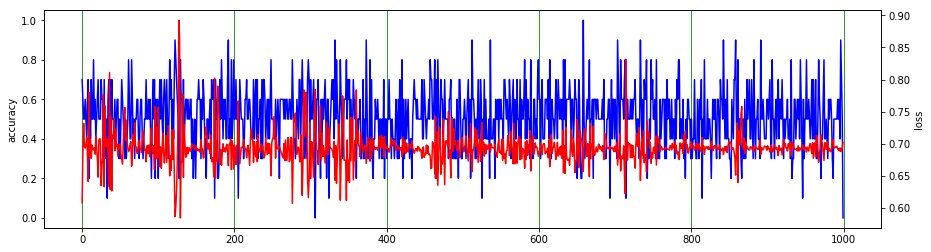

In [23]:
plt.figure(figsize=(15,4))
ax1 = plt.gca()
ax1.plot(train_acc,c='b')
ax1.set_ylabel('accuracy')
ax2 = ax1.twinx()
ax2.plot(train_loss,c='r')
ax2.set_ylabel('loss')
# ax1.set_xticks(np.arange(0,50001,10000))
ax1.grid(True,c='green',axis='x')

In [108]:
task = NBackTask(numback)
Xdata,Ydata = task.gen_seq(30,2)

In [148]:
loss,acc = trainer.eval_loop(10)

In [149]:
acc

array([14., 18., 14., 29., 29., 15., 23., 29., 13., 13.])

In [137]:
trainer.net.sess.run(trainer.net.randomize_emat)
loss,yhat,ybatch = trainer.eval_step(Xdata,Ydata)
np.sum(ybatch.argmax(2) == yhat.argmax(2))

12

[autoreload of nback failed: Traceback (most recent call last):
  File "/Users/abeukers/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/abeukers/wd/epm/nback.py", line 207
    eval_loss = self.net.sess.run([self.net.eval_loss,self.net.],feed_dict)
                                                               ^
SyntaxError: invalid syntax
]


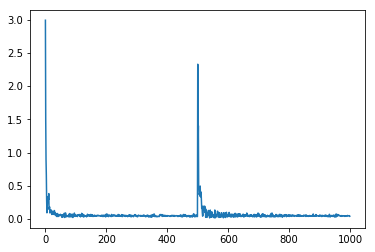

In [54]:
plt.plot(train_loss)

In [ ]:
tf.